In [1031]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1032]:
dataset_train = pd.read_csv('xtrainCyclodextrin.csv')
dataset_test = pd.read_csv('xtestCyclodextrin.csv')

In [1033]:
x_train = dataset_train
x_test = dataset_test

In [1034]:
# plt.plot(x_train['K'])

In [1035]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler


# selected_columns = ['K'] #['K','Erreur'] when I only consider K, the model gets significanntly better, idk why?
# X = x_train[selected_columns]

# # 2. Scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 3. Apply DBSCAN
# dbscan = DBSCAN(eps=0.01, min_samples=8)  #I geot these parameters after fine tuning, see Untitled11
# labels = dbscan.fit_predict(X_scaled)

# # 4. Identify outliers
# x_train['Cluster'] = labels
# outliers = x_train[x_train['Cluster'] == -1]

# print("Original Data:")
# print(x_train.shape)
# print("\nOutliers:")
# print(outliers[['K']])

In [1036]:
# x_train = x_train[x_train['Cluster']!=-1].drop(['Cluster'],axis=1)

In [1037]:
# Erreur = np.abs(np.exp(x_train.loc[x_train["logK"].isnull()==False,"logK"]) - x_train.loc[x_train["logK"].isnull()==False,"K"])/10
# x_train.loc[x_train["Erreur"].isnull()==True,"Erreur"] =Erreur
# x_test.loc[x_test["Erreur"].isnull()==True,"Erreur"] =x_train["Erreur"].mean() ##verifier si l'approche marche ou nn 
# # x_train.loc[x_train["Erreur"].isnull()==True,"Erreur"] = np.mean(x_train.loc[x_train["Erreur"].isnull()==False,"Erreur"])

In [1038]:
x_train['logK'] = np.log(x_train['K'])

In [1039]:
y_train = np.log(x_train['K'])

In [1040]:
x_train = x_train.drop(['Host','Original_Value','Guest','Erreur','CID_Host',"Reference","CID_Guest",'Charge_Host',"IsomericSMILES_Host","IsomericSMILES"],axis=1)
x_test = dataset_test.drop(['Host','Original_Value','Guest','Erreur',"Reference",'CID_Host',"CID_Guest",'Charge_Host',"IsomericSMILES_Host","IsomericSMILES"],axis=1)

In [1041]:
# x_train.loc[x_train['logK'].isnull()==True,'logK'] = np.log(x_train.loc[x_train['logK'].isnull()==True,'K'])

In [1042]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# categorical_columns = ["Host"] 
# Onehot = ["Host"]
# label_encoder = [] 
# for col in label_encoder:
#     x_train[col] = LabelEncoder().fit_transform(x_train[col])
# remainder_cols = [col for col in x_train.columns if col not in categorical_columns]
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False,handle_unknown="ignore"),Onehot)],remainder='passthrough')
# x_train_array = ct.fit_transform(x_train)
# encoded_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
# all_feature_names = list(encoded_feature_names) + remainder_cols
# x_train = pd.DataFrame(x_train_array, columns=all_feature_names)

In [1043]:
# x_test_array = ct.transform(x_test)
# for col in label_encoder:
#     x_test[col] = LabelEncoder().fit_transform(x_test[col])
# encoded_feature_names_test = ct.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
# all_feature_names_test = list(encoded_feature_names_test) + remainder_cols
# x_test = pd.DataFrame(x_test_array, columns=all_feature_names)

In [1044]:
import pandas as pd

# Assuming x_train is already defined (replace with your dataset if needed)
# If x_train is already a DataFrame:
# x_train = pd.DataFrame(...)

# Calculate the variance for each feature
correlation_matrix = x_train.corr()

# Display the variance matrix



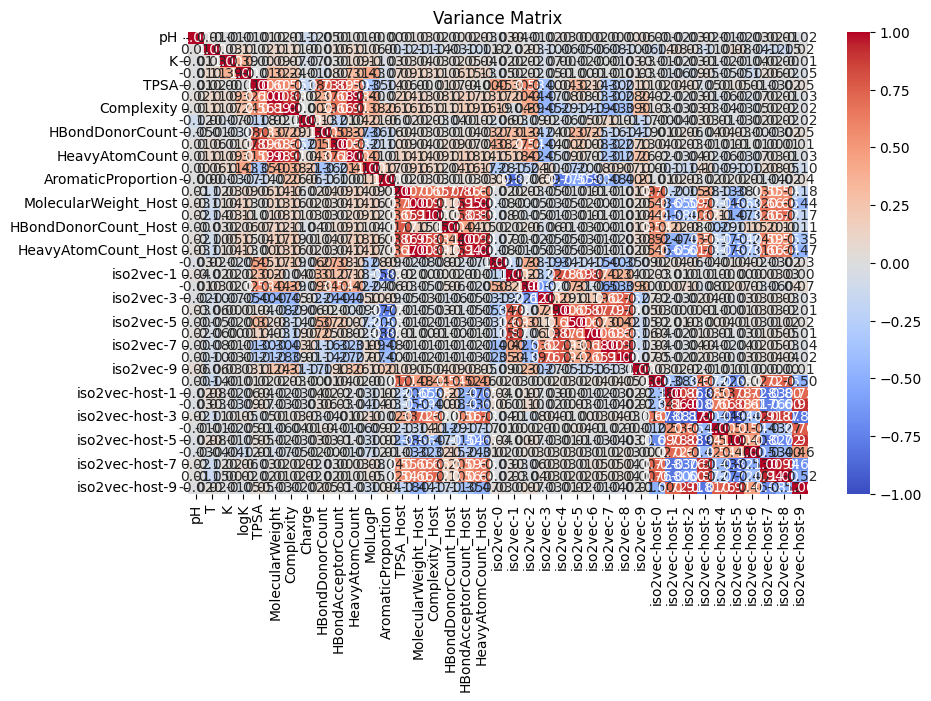

In [1045]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the variance matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Variance Matrix')
plt.show()


In [1046]:
correlation_matrix['HBondDonorCount_Host']

pH                         0.000668
T                         -0.032813
K                          0.024325
logK                       0.056807
TPSA                       0.071868
MolecularWeight            0.118953
Complexity                 0.114494
Charge                    -0.044160
HBondDonorCount            0.010006
HBondAcceptorCount         0.089182
HeavyAtomCount             0.109811
MolLogP                    0.037993
AromaticProportion         0.005968
TPSA_Host                  0.767737
MolecularWeight_Host       0.154758
Complexity_Host            0.051168
HBondDonorCount_Host       1.000000
HBondAcceptorCount_Host    0.436817
HeavyAtomCount_Host        0.145164
iso2vec-0                  0.022492
iso2vec-1                  0.018087
iso2vec-2                  0.059098
iso2vec-3                 -0.056018
iso2vec-4                  0.005171
iso2vec-5                 -0.031139
iso2vec-6                 -0.002257
iso2vec-7                 -0.008425
iso2vec-8                 -0

In [1047]:
correlation_threshold = 0.8

# Find pairs of columns with high correlation
high_correlation_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col1 = correlation_matrix.index[i]
            col2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            high_correlation_pairs.append((col1, col2, correlation_value))

# Convert to a DataFrame for better visualization
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=['Column 1', 'Column 2', 'Correlation'])

# Display highly correlated pairs
# print("Highly Correlated Column Pairs:")
# print(high_correlation_df)


In [1048]:

from itertools import combinations

correlation_threshold = 0.8

# Find all subsets of columns that are highly correlated within the group
def find_highly_correlated_groups(correlation_matrix, threshold):
    columns = correlation_matrix.columns
    n = len(columns)
    visited = set()
    correlated_groups = []

    for i in range(n):
        current_group = []
        for j in range(n):
            if i != j and abs(correlation_matrix.iloc[i, j]) > threshold:
                current_group.append(columns[j])
        if current_group:
            current_group.append(columns[i])  # Add the reference column itself
            current_group_set = frozenset(current_group)  # Use a set to ensure no duplicates
            if current_group_set not in visited:
                visited.add(current_group_set)
                correlated_groups.append(list(current_group_set))

    return correlated_groups

# Get the groups of highly correlated columns
highly_correlated_groups_1 = find_highly_correlated_groups(correlation_matrix, correlation_threshold)

# Display the groups
# print("Groups of Highly Correlated Columns:")
# for group in highly_correlated_groups:
#     print(group)


In [1049]:
# Representatives_corr_lin = ['MolecularWeight_Host','TPSA_Host','HeavyAtomCount_Host','HeavyAtomCount']

In [1050]:
columns_to_not_consider_lin = [col for group in  highly_correlated_groups_1 for col in group]

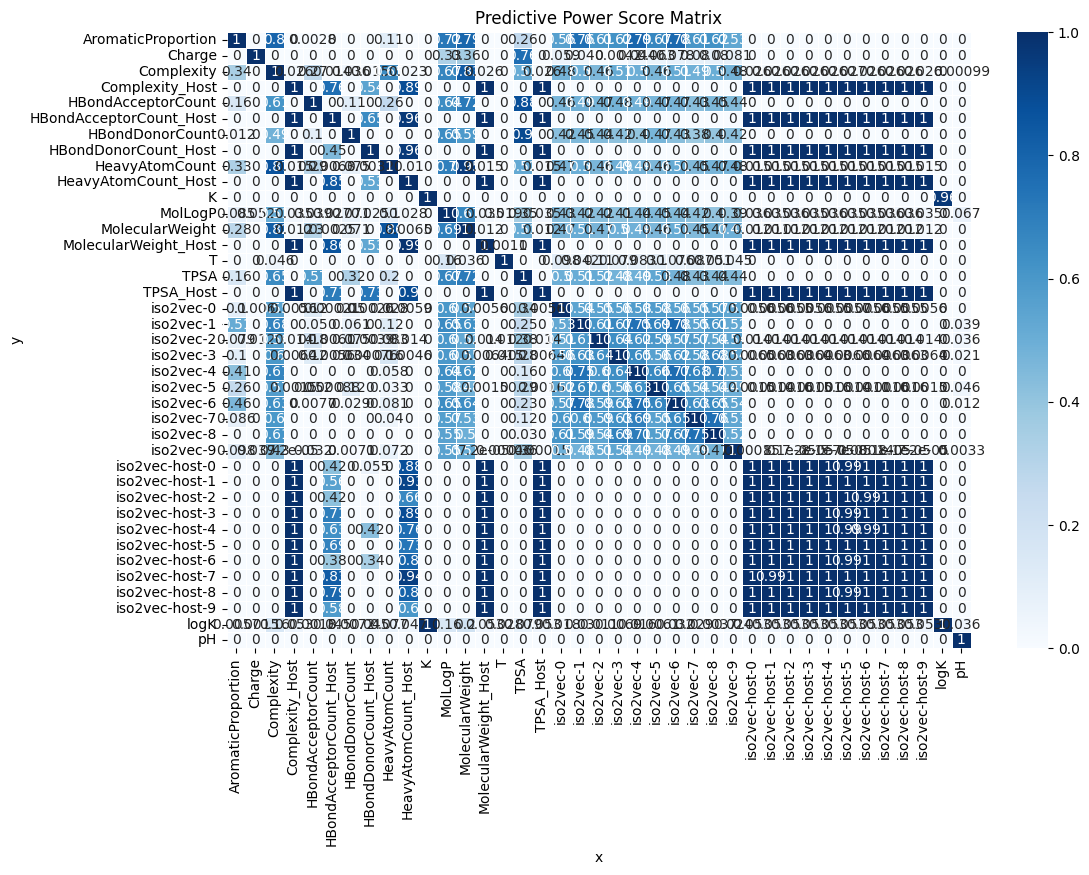

In [1051]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the PPS matrix
pps_matrix = pps.matrix(x_train)

# Pivot the PPS matrix for better visualization
matrix_df = pps_matrix.pivot(index='y', columns='x', values='ppscore')

# # Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('Predictive Power Score Matrix')
plt.show()


In [1052]:
matrix_df['TPSA_Host']

y
AromaticProportion         0.000000
Charge                     0.000000
Complexity                 0.025923
Complexity_Host            0.999637
HBondAcceptorCount         0.000000
HBondAcceptorCount_Host    0.999876
HBondDonorCount            0.000000
HBondDonorCount_Host       0.999483
HeavyAtomCount             0.014690
HeavyAtomCount_Host        0.999414
K                          0.000000
MolLogP                    0.035441
MolecularWeight            0.011569
MolecularWeight_Host       0.999435
T                          0.000000
TPSA                       0.000000
TPSA_Host                  1.000000
iso2vec-0                  0.005580
iso2vec-1                  0.000000
iso2vec-2                  0.014408
iso2vec-3                  0.006425
iso2vec-4                  0.000000
iso2vec-5                  0.001555
iso2vec-6                  0.000000
iso2vec-7                  0.000000
iso2vec-8                  0.000000
iso2vec-9                  0.000148
iso2vec-host-0            

In [1053]:
# matrix_df['logK']

In [1054]:
correlation_threshold = 0.8

# Find pairs of columns with high correlation
high_correlation_pairs = []
for i in range(matrix_df.shape[0]):
    for j in range(i + 1, matrix_df.shape[1]):
        if abs(matrix_df.iloc[i, j]) > correlation_threshold:
            col1 = matrix_df.index[i]
            col2 = matrix_df.columns[j]
            correlation_value = matrix_df.iloc[i, j]
            high_correlation_pairs.append((col1, col2, correlation_value))

# Convert to a DataFrame for better visualization
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=['Column 1', 'Column 2', 'Correlation'])

# Display highly correlated pairs
# print("Highly Correlated Column Pairs:")
# print(high_correlation_df)


In [1055]:

from itertools import combinations

correlation_threshold = 0.8

# Find all subsets of columns that are highly correlated within the group
def find_highly_correlated_groups(correlation_matrix, threshold):
    columns = correlation_matrix.columns
    n = len(columns)
    visited = set()
    correlated_groups = []

    for i in range(n):
        current_group = []
        for j in range(n):
            if i != j and abs(correlation_matrix.iloc[i, j]) > threshold:
                current_group.append(columns[j])
        if current_group:
            current_group.append(columns[i])  # Add the reference column itself
            current_group_set = frozenset(current_group)  # Use a set to ensure no duplicates
            if current_group_set not in visited:
                visited.add(current_group_set)
                correlated_groups.append(list(current_group_set))

    return correlated_groups

# Get the groups of highly correlated columns
highly_correlated_groups = find_highly_correlated_groups(matrix_df, correlation_threshold)

# Display the groups
# print("Groups of Highly Correlated Columns:")
# for group in highly_correlated_groups:
#     print(group)



In [1056]:
Representatives = ['Complexity','HBondAcceptorCount_Host','HBondDonorCount_Host','HeavyAtomCount','iso2vec-host-0','TPSA','Complexity','TPSA_Host','Complexity_Host']

In [1057]:
columns_to_not_consider = [col for group in highly_correlated_groups for col in group]

In [1058]:
cols_not_consider = list(set([col for col in columns_to_not_consider if col not in Representatives]))

In [1059]:
x_train = x_train.drop(cols_not_consider,axis=1)

In [1060]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score


# # Scatter plot of the data
# plt.scatter(np.log(dataset_train['K']), y_train, color='blue', label='Data')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter Plot')
# plt.legend()
# plt.show()

# # Linear regression
# linear_model = LinearRegression()
# linear_model.fit(x_train, y_train)
# y_pred_linear = linear_model.predict(x_train)

# # Polynomial regression (degree 2)
# poly = PolynomialFeatures(degree=3)
# x_poly = poly.fit_transform(x_train)
# poly_model = LinearRegression()
# poly_model.fit(x_poly, y_train)
# y_pred_poly = poly_model.predict(x_poly)

# # Evaluate models
# print("Linear Regression:")
# print("MSE:", mean_squared_error(y_train, y_pred_linear))
# print("R^2:", r2_score(y_train, y_pred_linear))

# print("\nPolynomial Regression (Degree 2):")
# print("MSE:", mean_squared_error(y_train, y_pred_poly))
# print("R^2:", r2_score(y_train, y_pred_poly))

# # Plot results
# plt.scatter(np.log(dataset_train['K']), y_train, color='blue', label='Data')
# plt.plot(np.log(dataset_train['K']), y_pred_linear, color='green', label='Linear Fit')
# plt.plot(np.log(dataset_train['K']), y_pred_poly, color='red', label='Polynomial Fit (Degree 2)')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Model Comparison')
# plt.legend()
# plt.show()


In [1061]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# import numpy as np

# # Example datasets
# # x_train = pd.DataFrame(...)
# # x_test = pd.DataFrame(...)

# # One-Hot Encoding for "Host"
# onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# onehot_encoder.fit(x_train[['Host']])

# # Transform both datasets
# host_train = onehot_encoder.transform(x_train[['Host']])
# host_test = onehot_encoder.transform(x_test[['Host']])

# # Convert back to DataFrame with proper column names
# host_train_df = pd.DataFrame(host_train, columns=onehot_encoder.get_feature_names_out(['Host']))
# host_test_df = pd.DataFrame(host_test, columns=onehot_encoder.get_feature_names_out(['Host']))

# # Drop the original "Host" column and concatenate the encoded columns
# x_train = pd.concat([x_train.drop(columns=['Host']), host_train_df], axis=1)
# x_test = pd.concat([x_test.drop(columns=['Host']), host_test_df], axis=1)

# # Label Encoding for "Isomeric" and "Isometric"
# # for col in ["IsomericSMILES_Host","IsomericSMILES"]:
# #     label_encoder = LabelEncoder()
# #     label_encoder.fit(x_train[col])  # Fit on x_train

# #     # Create a mapping for unseen categories
# #     known_classes = set(label_encoder.classes_)
# #     x_test[col] = x_test[col].apply(lambda x: x if x in known_classes else None)  # Mark unseen as None

# #     # Fit-transform x_train and map x_test values
# #     x_train[col] = label_encoder.transform(x_train[col])
# #     x_test[col] = x_test[col].map(lambda x: label_encoder.transform([x])[0] if x in known_classes else -1)


In [1062]:
# scaler = StandardScaler()
# y_sc = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# y_train = pd.DataFrame(y_train)
# y_train_scaled = y_sc.fit_transform(y_train)

In [1063]:
lr, Gamma, n_est, md, sub, col, Rega, Regl =  [0.01, 0.01, 400, 11, 0.6, 0.8, 0.1, 1.5] ##I got these parameters after fine tuning, see Untitled11
best_params = {"learning_rate" : lr, 
               "gamma" : Gamma, 
               "n_estimators" : n_est, 
                "max_depth":md,
                "reg_lambda":Regl,
               "reg_alpha":Rega,
               "subsample":sub,
               "colsample_bytree":col,
              "booster" : 'gbtree', 
              "random_state":42}

In [1064]:
# ##Regression model for train:
# from xgboost import XGBRegressor
# test_data = x_train[x_train["Erreur"].isnull()==True]
# train_data = x_train[x_train["Erreur"].isnull()==False]
# y_train_Erreur = train_data[["Erreur"]]
# x_train_Erreur = train_data.drop("Erreur",axis=1)
# x_test_Erreur = test_data.drop("Erreur",axis=1)
# model_for_Erreur = XGBRegressor(learning_rate = 0.1,n_estimators = 75,max_depth=6)
# model_for_Erreur.fit(x_train_Erreur.values,y_train_Erreur)
# # Make predictions
# y_pred_Erreur = model_for_Erreur.predict(x_test_Erreur.values)

In [1065]:
# # Filter the data where 'Erreur' is null
# data = dataset_train
# data.loc[data['Erreur'].isnull()==True,'Erreur'] = y_pred_Erreur
# # Extract the 'K' column as a list
# LK = list(data['K'])
# y = list(data['Erreur'])
# # Check if lengths of LK and y_pred_Erreur are equal
# # if len(LK) != len(y_pred_Erreur):
# #     raise ValueError("Mismatch: Length of LK and y_pred_Erreur must be the same!")

# # # Print pairs of predicted and actual values (optional for debugging)
# # for i in range(len(y_pred_Erreur)):
# #     print(f"Erreur: {y_pred_Erreur[i]}; K: {LK[i]}")

# # Plot the actual K (LK) vs predicted values (y_pred_Erreur)
# plt.figure(figsize=(8, 6))
# plt.scatter(LK, y, color='blue', label='Erreur based on K')
# plt.xlabel('K')
# plt.ylabel('Erreur')
# plt.title('Erreur based on K')
# plt.legend()
# plt.grid(True)
# plt.show()


In [1066]:
# x_train.loc[x_train["Erreur"].isnull()==True,'Erreur'] = y_pred_Erreur

In [1067]:
# ##Regression model for test:

# test_test_data = x_test[x_test["Erreur"].isnull()==True]
# test_train_data = x_test[x_test["Erreur"].isnull()==False]
# y_test_train_Erreur = test_train_data[["Erreur"]]
# x_test_train_Erreur = test_train_data.drop("Erreur",axis=1)
# x_test_test_Erreur = test_test_data.drop("Erreur",axis=1)
# model_for_Erreur = XGBRegressor(**best_params)
# model_for_Erreur.fit(x_test_train_Erreur.values,y_test_train_Erreur)
# # Make predictions
# y_test_pred_Erreur = model_for_Erreur.predict(x_test_test_Erreur.values)

In [1068]:
# x_test.loc[x_test["Erreur"].isnull()==True,'Erreur'] = y_test_pred_Erreur

In [1069]:
# x_train.loc[x_train["Erreur"].isnull()==True,'Erreur'] = 0 #np.mean(x_train.loc[x_train["Erreur"].isnull()==False,'Erreur'])

In [1070]:
###Feature engineering
x_train.columns

Index(['pH', 'T', 'TPSA', 'Complexity', 'Charge', 'HeavyAtomCount', 'MolLogP',
       'AromaticProportion', 'TPSA_Host', 'Complexity_Host',
       'HBondDonorCount_Host', 'HBondAcceptorCount_Host', 'iso2vec-0',
       'iso2vec-1', 'iso2vec-2', 'iso2vec-3', 'iso2vec-4', 'iso2vec-5',
       'iso2vec-6', 'iso2vec-7', 'iso2vec-8', 'iso2vec-9', 'iso2vec-host-0'],
      dtype='object')

In [1071]:
np.min(x_train['Complexity']),np.max(x_train['Complexity'])

(0.0, 1822.6770407927388)

In [1072]:
for col in x_train.columns:
    print(col,np.min(x_train[col]),np.max(x_train[col]),np.mean(x_train[col]))

pH 1.1 11.3 6.929425170068028
T 287.0 323.0 297.8255442176871
TPSA 0.0 239.97 48.292697278911575
Complexity 0.0 1822.6770407927388 372.5700210689837
Charge -3 2 -0.03197278911564626
HeavyAtomCount 1 42 14.66326530612245
MolLogP -4.124 9.079900000000002 1.9724173231292523
AromaticProportion 0.0 1.0 0.3942226651771768
TPSA_Host 249.2099999999999 857.6400000000004 537.8347482993199
Complexity_Host 1233.4857443469036 3047.539510771213 1516.9547088589127
HBondDonorCount_Host 0 24 19.607142857142858
HBondAcceptorCount_Host 27 49 34.49115646258503
iso2vec-0 -0.7876928 1.5513912 0.2800654935390374
iso2vec-1 -2.662436 1.1156886 -0.7652864809364899
iso2vec-2 -2.1133866 0.41314438 -0.3832133241656871
iso2vec-3 -0.18859997 3.3309464 0.9388299812541155
iso2vec-4 -0.9839139 3.0790162 0.15198372886343164
iso2vec-5 -1.1286232 0.8065633 -0.26788116830629255
iso2vec-6 -1.2576653 2.3802636 0.012804075237176868
iso2vec-7 -0.46666822 2.7333593 0.3690916269235085
iso2vec-8 -0.2288934 4.1727934 0.68504117543

In [1075]:
apply = {'log' : ['HeavyAtomCount','TPSA_Host','T','Complexity'],
         'sqrt' : ['AromaticProportion','HBondDonorCount_Host','HBondAcceptorCount_Host'],
          'qube' : ['iso2vec-0','iso2vec-1','iso2vec-2','iso2vec-3','iso2vec-4','iso2vec-5','iso2vec-6','iso2vec-7','iso2vec-8','iso2vec-9','iso2vec-host-0'],
           'qube' : [],
            }

In [1087]:
X_train = x_train.copy()

In [1088]:
# for val in apply:
#     for elt in apply[val]:
#         if val=='log':
#             List = []
#             for x in X_train[elt]:
#                 if x!=0:
#                     x = np.sign(x)*np.log(np.abs(x))
#                 List.append(x)
#             X_train[elt] = List
#         elif val=='sqrt':
#             X_train[elt] = [np.sign(x)*np.sqrt(np.abs(x)) for x in X_train[elt]]
#         elif val == 'squared':
#             X_train[elt] = [np.sign(x)*(x**2) for x in X_train[elt]]
#         elif val == 'qube':
#             X_train[elt] = [np.sign(x)*(x**3) for x in X_train[elt]]
# X_train['Charge_pH'] = np.exp(X_train['Charge'])*X_train['pH'] 
# X_train['pH_deviation_from_neutral'] = np.abs(X_train['pH'] - 7)  # Distance from neutral pH
# X_train['pH_acidic'] = np.where(X_train['pH'] < 7, 7 - X_train['pH'], 0)  # Acidic contribution
# X_train['pH_basic'] = np.where(X_train['pH'] > 7, X_train['pH'] - 7, 0)  # Basic contribution

# # For charged molecules (when they exist)
# X_train['charge_present'] = np.where(X_train['Charge'] != 0, 1, 0)  # Binary indicator of charge
# X_train['charge_pH_effect'] = np.where(X_train['Charge'] != 0,
#                                       X_train['Charge'] * np.exp(-X_train['pH']),
#                                       X_train['pH_deviation_from_neutral'])
# X_train['charge_present'] = np.where(X_train['Charge'] != 0, 1, 0)
# X_train['charge_pH_effect'] = np.where(X_train['Charge'] != 0,
#                                       X_train['Charge'] * np.exp(-X_train['pH']),
#                                       X_train['pH_deviation_from_neutral'])
# T_kelvin = X_train['T']  # Ensure temperature is in Kelvin
# X_train['inverse_T'] = np.where(T_kelvin > 0, 1 / T_kelvin, 0)  # Safe division
# X_train['log_T'] = np.where(T_kelvin > 0, np.log(T_kelvin), 0)  # Safe log

# # Lipophilicity features
# X_train['pH_dependent_logP'] = X_train['MolLogP'] * (1 / (1 + np.exp(np.abs(X_train['pH'] - 7))))
# X_train['logP_T_interaction'] = X_train['MolLogP'] * X_train['inverse_T']

# # pH-dependent features
# X_train['pH_logP_interaction'] = X_train['MolLogP'] * X_train['pH_deviation_from_neutral']
# X_train['pH_TPSA_interaction'] = X_train['TPSA'] * X_train['pH_deviation_from_neutral']

# EPSILON = 1e-10  # Small constant for safe division

# # Normalized molecular features with safety checks
# X_train['normalized_complexity'] = X_train['Complexity'] / (X_train['HeavyAtomCount'] + EPSILON)
# X_train['aromatic_density'] = X_train['AromaticProportion'] * X_train['HeavyAtomCount']

# # Host-Guest relationship features with safety checks
# X_train['tpsa_ratio'] = X_train['TPSA'] / (X_train['TPSA_Host'] + EPSILON)
# X_train['complexity_ratio'] = X_train['Complexity'] / (X_train['Complexity_Host'] + EPSILON)

# # Surface area and complexity interactions
# X_train['surface_complexity_interaction'] = X_train['TPSA'] * X_train['normalized_complexity']

# iso2vec_cols = [col for col in X_train.columns if 'iso2vec-' in col and 'host' not in col]
# if iso2vec_cols:
#     guest_iso2vec = X_train[iso2vec_cols]
    
#     X_train['iso2vec_mean'] = guest_iso2vec.mean(axis=1)
#     X_train['iso2vec_std'] = guest_iso2vec.std(axis=1)
#     X_train['iso2vec_max'] = guest_iso2vec.max(axis=1)
    
#     for col in iso2vec_cols:
#         X_train[f'iso2vec_host_ratio_{col}'] = X_train[col] / (X_train['iso2vec-host-0'] + 1e-6)


# physchem_features = create_physical_chemical_features(X_train)
# mol_features = create_molecular_structure_features(X_train)
# hbond_features = create_hbond_features(X_train)
# iso2vec_features = create_iso2vec_features(X_train)

# X_train = pd.concat([
#     physchem_features,
#     mol_features,
#     hbond_features,
#     iso2vec_features
# ], axis=1)

# X_train['binding_energy_proxy'] = (
#     hbond_features['hbond_density'] * 
#     physchem_features['inverse_T'] * 
#     mol_features['surface_complexity_interaction']
# )

In [1089]:
X_train['Complexity']

0        29.368066
1       940.563932
2       284.649333
3         2.000000
4       967.433029
           ...    
2935    192.917494
2936    138.000000
2937    807.205441
2938    164.186838
2939    143.246629
Name: Complexity, Length: 2940, dtype: float64

In [1090]:
X_train['T']

0       298.0
1       298.0
2       298.0
3       298.0
4       298.0
        ...  
2935    298.0
2936    298.0
2937    298.0
2938    298.0
2939    298.0
Name: T, Length: 2940, dtype: float64

In [1095]:
# import numpy as np
# import pandas as pd

# def create_physical_chemical_features(df):
#     """
#     Create features based on physical-chemical relationships
#     """
#     features = pd.DataFrame()
    
#     # pH-based features that don't rely on charge
#     features['pH_deviation_from_neutral'] = np.abs(df['pH'] - 7)
#     features['pH_acidic'] = np.where(df['pH'] < 7, 7 - df['pH'], 0)
#     features['pH_basic'] = np.where(df['pH'] > 7, df['pH'] - 7, 0)
    
#     # For charged molecules
#     features['charge_present'] = np.where(df['Charge'] != 0, 1, 0)
#     features['charge_pH_effect'] = np.where(df['Charge'] != 0,
#                                           df['Charge'] * np.exp(-df['pH']),
#                                           features['pH_deviation_from_neutral'])
    
#     # Temperature-based features with safety checks
#     T_kelvin = df['T']  # Ensure temperature is in Kelvin
#     features['inverse_T'] = np.where(T_kelvin > 0, 1 / T_kelvin, 0)  # Safe division
#     features['log_T'] = np.where(T_kelvin > 0, np.log(T_kelvin), 0)  # Safe log
    
#     # Lipophilicity features
#     features['pH_dependent_logP'] = df['MolLogP'] * (1 / (1 + np.exp(np.abs(df['pH'] - 7))))
#     features['logP_T_interaction'] = df['MolLogP'] * features['inverse_T']
    
#     # pH-dependent features
#     features['pH_logP_interaction'] = df['MolLogP'] * features['pH_deviation_from_neutral']
#     features['pH_TPSA_interaction'] = df['TPSA'] * features['pH_deviation_from_neutral']
    
#     return features

# def create_molecular_structure_features(df):
#     """
#     Create features based on molecular structure relationships
#     """
#     features = pd.DataFrame()
#     EPSILON = 1e-10  # Small constant for safe division
    
#     # Normalized molecular features with safety checks
#     features['normalized_complexity'] = list(df['Complexity']) / (df['HeavyAtomCount'] + EPSILON)
#     features['aromatic_density'] = df['AromaticProportion'] * df['HeavyAtomCount']
    
#     # Host-Guest relationship features with safety checks
#     features['tpsa_ratio'] = df['TPSA'] / (df['TPSA_Host'] + EPSILON)
#     features['complexity_ratio'] = df['Complexity'] / (df['Complexity_Host'] + EPSILON)
    
#     # Surface area and complexity interactions
#     features['surface_complexity_interaction'] = df['TPSA'] * features['normalized_complexity']
    
#     return features

# def create_hbond_features(df):
#     """
#     Create hydrogen bonding related features
#     """
#     features = pd.DataFrame()
#     EPSILON = 1e-10
    
#     features['total_hbond_capacity'] = df['HBondDonorCount_Host'] + df['HBondAcceptorCount_Host']
#     features['hbond_ratio'] = (df['HBondDonorCount_Host'] + 1) / (df['HBondAcceptorCount_Host'] + 1)
#     features['hbond_density'] = features['total_hbond_capacity'] / (df['TPSA_Host'] + EPSILON)
    
#     return features

# def create_iso2vec_features(df):
#     """
#     Create features from iso2vec embeddings
#     """
#     features = pd.DataFrame()
    
#     # Check if required columns exist
#     iso2vec_cols = [col for col in df.columns if 'iso2vec-' in col and 'host' not in col]
#     if not iso2vec_cols:
#         return features
    
#     guest_iso2vec = df[iso2vec_cols]
    
#     features['iso2vec_mean'] = guest_iso2vec.mean(axis=1)
#     features['iso2vec_std'] = guest_iso2vec.std(axis=1)
#     features['iso2vec_max'] = guest_iso2vec.max(axis=1)
    
#     for col in iso2vec_cols:
#         features[f'iso2vec_host_ratio_{col}'] = df[col] / (df['iso2vec-host-0'] + 1e-6)
    
#     return features

# def create_combined_features(df):
#     """
#     Master function to create all features and important combinations
#     """
#     try:
#         physchem_features = create_physical_chemical_features(df)
#         mol_features = create_molecular_structure_features(df)
#         hbond_features = create_hbond_features(df)
#         iso2vec_features = create_iso2vec_features(df)
        
#         all_features = pd.concat([
#             physchem_features,
#             mol_features,
#             hbond_features,
#             iso2vec_features
#         ], axis=1)
        
#         all_features['binding_energy_proxy'] = (
#             hbond_features['hbond_density'] * 
#             physchem_features['inverse_T'] * 
#             mol_features['surface_complexity_interaction']
#         )
        
#         return all_features
        
#     except Exception as e:
#         print(f"Error in feature creation: {str(e)}")
#         return pd.DataFrame()

In [1096]:
# #Lets try standirdazation:
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()
# X_scaled = scaler_x.fit_transform(x_train)
# y_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1))

In [1097]:
XG_reg = XGBRegressor(
    **best_params
) 


In [1098]:
# from sklearn.model_selection import cross_val_predict
# y_pred_on_train = cross_val_predict(estimator=XG_reg,X=x_train,y=y_train,cv=5)

In [1099]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation
scores = cross_val_score(estimator=XG_reg, X=X_train, y=y_train, cv=5,scoring = 'neg_mean_absolute_error')  # 5-fold CV is relevant to get an idea of the model's performance
print(f"MAE Scores: {-scores}")
print(f"Mean MAE Score: {-scores.mean()} (+/- {scores.std()})")

MAE Scores: [0.8767545  0.88072783 0.85083517 0.84923518 0.82568883]
Mean MAE Score: 0.8566483033306174 (+/- 0.020155982919780047)


In [1100]:
scores = cross_val_score(estimator=XG_reg, X=X_train, y=y_train, cv=5,scoring = 'neg_mean_squared_error') # 5-fold CV is relevant to get an idea of the model's performance
scores = np.sqrt(-scores)
print(f"RMSE Scores: {scores}")
print(f"Mean RMSE Score: {scores.mean()} (+/- {scores.std()})")

RMSE Scores: [1.22275348 1.22749168 1.19048198 1.18486717 1.15888722]
Mean RMSE Score: 1.19689630451987 (+/- 0.025436998276650254)


In [1101]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation
scores = cross_val_score(estimator=XG_reg, X=X_train, y=y_train, cv=5,scoring = 'r2')  # 5-fold CV is relevant to get an idea of the model's performance
print(f"CV Scores: {scores}")
print(f"Mean CV Score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

CV Scores: [0.64363995 0.6209514  0.62606696 0.62736242 0.64831869]
Mean CV Score: 0.633 (+/- 0.021)


In [626]:
XG_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [627]:
L = list(x_train.columns)
Impo = XG_reg.feature_importances_
for i in range(x_train.shape[1]):
    print(L[i]," : ",Impo[i])

pH  :  0.014425143
T  :  0.020927433
TPSA  :  0.021263892
Complexity  :  0.028754773
Charge  :  0.04145883
HeavyAtomCount  :  0.07414033
MolLogP  :  0.1079093
AromaticProportion  :  0.062238693
TPSA_Host  :  0.025965702
Complexity_Host  :  0.034244746
HBondDonorCount_Host  :  0.035333715
HBondAcceptorCount_Host  :  0.14580119
iso2vec-0  :  0.027440203
iso2vec-1  :  0.029626783
iso2vec-2  :  0.034045435
iso2vec-3  :  0.044577286
iso2vec-4  :  0.045881502
iso2vec-5  :  0.034161907
iso2vec-6  :  0.035516504
iso2vec-7  :  0.035262432
iso2vec-8  :  0.045160014
iso2vec-9  :  0.03237205
iso2vec-host-0  :  0.023492139


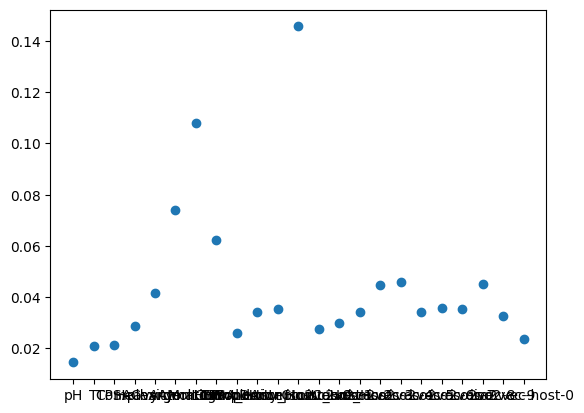

In [629]:
plt.scatter(L,Impo)

In [505]:
x_train

,pH,T,TPSA,Complexity,Charge,HeavyAtomCount,MolLogP,AromaticProportion,TPSA_Host,Complexity_Host,...,iso2vec-0,iso2vec-1,iso2vec-2,iso2vec-3,iso2vec-4,iso2vec-5,iso2vec-6,iso2vec-7,iso2vec-8,iso2vec-9
0,7.0,298.0,20.23,29.368066,0,8,1.94910,0.000000,633.20,1704.413059,...,-0.590362,0.569070,-1.038443,2.361415,2.118422,0.492413,1.725022,2.161616,3.276140,-0.211798
1,7.0,298.0,129.80,940.563932,0,26,0.90280,0.384615,554.05,1467.088147,...,0.387218,-0.542010,-0.050399,0.486912,0.286548,-0.189412,0.044045,0.362698,0.603684,0.026983
2,6.9,298.0,46.50,284.649333,0,13,2.14660,0.000000,554.05,1467.088147,...,0.155656,0.139775,-0.114050,0.386213,0.560656,0.025943,0.398121,0.088162,0.319128,-0.155858
3,7.0,298.0,0.00,2.000000,0,2,0.54600,0.000000,618.66,1996.520905,...,0.038540,0.015792,-0.021585,-0.002527,0.025887,-0.006752,0.016965,0.121710,0.052435,0.049460
4,7.0,298.0,74.97,967.433029,0,23,2.27650,0.434783,837.41,3047.539511,...,0.359555,-0.604094,-0.009712,0.533275,0.031643,-0.145909,-0.123494,-0.020888,0.377079,-0.062353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,6.9,298.0,47.87,192.917494,1,10,0.17660,0.600000,554.05,1467.088147,...,0.479604,-1.119050,-0.229850,0.972447,-0.174548,-0.339284,-0.319113,0.578736,0.696686,-0.164873
2936,7.0,298.0,118.22,138.000000,0,12,-3.37880,0.000000,474.90,1233.485744,...,0.669563,0.964526,0.193677,0.156800,0.253735,0.043036,0.778672,-0.201749,-0.217531,-0.323285
2937,6.9,298.0,124.96,807.205441,0,28,1.81900,0.428571,633.20,1704.413059,...,0.432026,-0.303792,-0.019392,0.721859,0.042055,0.140136,0.232886,0.057851,0.478848,-0.032387
2938,7.0,298.0,74.60,164.186838,0,10,0.32590,0.000000,474.90,1233.485744,...,0.652298,-0.489928,-0.101277,0.884255,0.336857,0.195199,0.334072,0.243536,0.719933,-0.486817


In [676]:
# from sklearn.inspection import permutation_importance
# r = permutation_importance(XG_reg, x_train, y_train,
#                            n_repeats=30,
#                            random_state=0)

# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{x_train.feature_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [418]:
residuals = np.exp(y_train) - np.exp(y_pred_on_train)

In [1102]:
residuals

0      -1.246415
1      -0.434527
2       0.798123
3      -1.204602
4       1.043930
          ...   
2935    0.188536
2936   -0.328309
2937   -0.670988
2938    0.503285
2939    0.277884
Name: K, Length: 2940, dtype: float64

In [425]:
max(residuals)

226558.4956054689

In [ ]:
y_pred

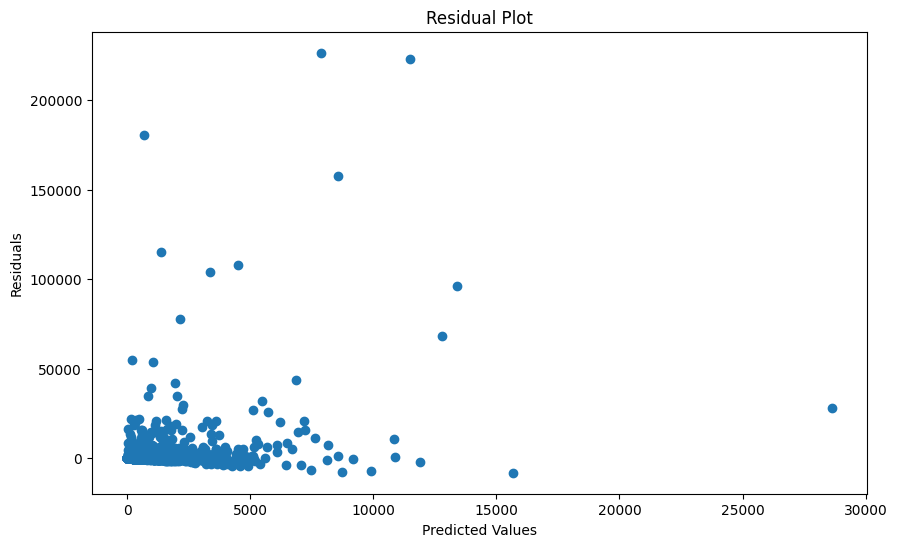

In [426]:
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_pred_on_train), residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
##Funnel shaped?

In [437]:
score = 0
for y in y_train:
    score+= np.exp(y)
score*(1-np.exp(0.79)+1-np.exp(-0.79)-1)/(2940*2)

-1480.8867988482796

In [454]:
residuals_logK = y_train-y_pred_on_train
sigma_squared = np.var(residuals_logK, ddof=1)  # ddof=1 for sample variance

# Apply bias correction
K_predicted_corrected = np.exp(y_pred_on_train + sigma_squared / 2)

# Print corrected predictions
print("MAE:", np.mean(list(K_predicted_corrected-np.exp(y_train))))
print("MAE si pas de correction:",np.mean(list(np.exp(y_pred_on_train)-np.exp(y_train))))
print("RMSE:",np.sqrt(np.mean((list((K_predicted_corrected-np.exp(y_train))**2)))))
print("MAE si pas de correction:",np.sqrt(np.mean(list((np.exp(y_pred_on_train)-np.exp(y_train))**2)))) ##On utilise la correction dans notre approach

MAE: -492.2686960684199
MAE si pas de correction: -1156.7614183272635
RMSE: 8809.761687599736
MAE si pas de correction: 9214.170752949361


In [452]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error,mean_absolute_error
# Custom scoring function to compute RMSE on K
def rmse_on_K(y_true, y_pred):
    residuals_logK = y_true-y_pred
    mad = np.median(np.abs(residuals - np.median(residuals)))  # Median Absolute Deviation
    sigma_squared = (mad / 0.6745)**2  # Approximate variance from MAD
    # sigma_squared = np.var(residuals_logK, ddof=1)  # ddof=1 for sample variance
    # Apply bias correction
    K_pred = np.exp(y_pred + sigma_squared / 2)
    K_true = np.exp(y_true)
    # K_pred = np.exp(y_pred)
    return mean_absolute_error(K_true, K_pred)

# Create a scorer
rmse_K_scorer = make_scorer(rmse_on_K, greater_is_better=False)

# Perform cross-validation
scores = cross_val_score(estimator=XG_reg, X=x_train, y=y_train, cv=5, scoring=rmse_K_scorer)
mean_rmse = -scores.mean()  # Negate because `make_scorer` assumes maximization
print(f"Mean RMSE Score on K values: {mean_rmse}")
print("scores:",scores) 


Mean RMSE Score on K values: 1412.7995748607477
scores: [-1493.76741539 -1483.75920044 -1128.70455704 -1706.70920992
 -1251.05749152]


In [754]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_regression

# Define the fitness function for PSO
def fitness_function(params, X, y, cv=3):
    C, gamma, epsilon = params
    model = SVR(C=C, gamma=gamma, epsilon=epsilon, kernel='rbf')
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return -scores.mean()  # Minimize the negative mean squared error

# PSO parameters
class PSO:
    def __init__(self, n_particles, dim, bounds, max_iter, inertia=0.5, cognitive=1.5, social=2.0):
        self.n_particles = n_particles
        self.dim = dim
        self.bounds = bounds
        self.max_iter = max_iter
        self.inertia = inertia
        self.cognitive = cognitive
        self.social = social

        # Initialize particles
        self.positions = np.random.uniform(
            [b[0] for b in bounds], [b[1] for b in bounds], (n_particles, dim)
        )
        self.velocities = np.random.uniform(-1, 1, (n_particles, dim))
        self.personal_best_positions = np.copy(self.positions)
        self.personal_best_scores = np.full(n_particles, np.inf)
        self.global_best_position = None
        self.global_best_score = np.inf

    def optimize(self, fitness_fn, X, y):
        for iteration in range(self.max_iter):
            for i in range(self.n_particles):
                # Evaluate fitness
                fitness = fitness_fn(self.positions[i], X, y)
                if fitness < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness
                    self.personal_best_positions[i] = self.positions[i]

                if fitness < self.global_best_score:
                    self.global_best_score = fitness
                    self.global_best_position = self.positions[i]

            # Update velocities and positions
            r1, r2 = np.random.rand(self.n_particles, self.dim), np.random.rand(self.n_particles, self.dim)
            cognitive_component = self.cognitive * r1 * (self.personal_best_positions - self.positions)
            social_component = self.social * r2 * (self.global_best_position - self.positions)
            self.velocities = (
                self.inertia * self.velocities + cognitive_component + social_component
            )

            # Update positions
            self.positions += self.velocities
            self.positions = np.clip(self.positions, [b[0] for b in self.bounds], [b[1] for b in self.bounds])

        return self.global_best_position, self.global_best_score

# Example usage
if __name__ == "__main__":

    # Define bounds for SVR hyperparameters
    bounds = [(0.1, 100),  # C
              (1e-4, 1),   # gamma
              (0.01, 1)]   # epsilon

    # Initialize and optimize PSO
    pso = PSO(n_particles=10, dim=3, bounds=bounds, max_iter=30)
    best_params, best_score = pso.optimize(fitness_function, x_train, y_train.values.ravel())

    print(f"Best Parameters: C={best_params[0]}, gamma={best_params[1]}, epsilon={best_params[2]}")
    print(f"Best Fitness Score (MSE): {-best_score}")

    # # Train and evaluate the best model
    # best_model = SVR(C=best_params[0], gamma=best_params[1], epsilon=best_params[2], kernel='rbf')
    # best_model.fit(x_train, y_train)
    # print(f"Test Score (MSE): {-best_model.score(x_test, y_test)}")


Best Parameters: C=8.613960927505058, gamma=0.031536659855680535, epsilon=0.3729239054675091
Best Fitness Score (MSE): -1.374417866401985


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

# Perform cross-validation and get predictions for logK
logK_predictions = cross_val_predict(estimator=XG_reg, X=x_train.values, y=y_train, cv=5)

# Convert predictions from logK to K
K_predictions = np.exp(logK_predictions)
K_actual = np.exp(y_train)  # Transform true logK values to K

# Compute RMSE on K values
rmse = mean_absolute_error(K_actual, K_predictions)
print(f"Mean RMSE Score on K values: {rmse}")

In [1103]:
XG_reg.fit(x_train.values,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1108]:
x_test = x_test.drop([col for col in cols_not_consider if col not in ['logK','K']],axis=1)

In [1110]:
log_k_pred = XG_reg.predict(x_test.values)

In [1111]:
log_k_pred

array([5.5193357, 4.139568 , 6.2901363, 3.6922245, 5.386534 , 3.515295 ,
       6.2566285, 7.5491457, 5.408687 , 5.504279 , 6.0537167, 5.958317 ,
       6.6470304, 6.5473843, 4.5387926, 4.166586 , 6.09604  , 5.5736375,
       4.448514 , 4.0597363, 4.764642 , 5.925777 , 4.0794935, 3.8824956,
       5.837179 , 3.8815203, 7.2869353, 5.0780525, 6.1741056, 4.3667336,
       6.8055844, 4.3928294, 5.4748693, 5.128698 , 7.8335943, 2.8276372,
       7.6363535, 9.333473 , 8.245424 , 6.081204 , 6.353685 , 5.8427534,
       4.860978 , 4.1000032, 5.4987984, 5.4438696, 6.298584 , 3.0251064,
       5.0028195, 3.767017 , 5.8798723, 6.2165675, 7.42947  , 5.6402287,
       4.422426 , 5.870496 , 5.7698507, 2.9763727, 4.712852 , 4.6757054,
       3.9451692, 6.9062395, 7.3910604, 6.467577 , 7.705399 , 3.1686115,
       7.0241017, 5.3844175, 4.139568 , 3.697674 , 8.914661 , 5.255692 ,
       6.31645  , 5.8217087, 7.6686373, 7.3844714, 4.7803845, 4.5430646,
       5.765987 , 6.3573003, 4.310051 , 4.828589 , 

In [1112]:
sigma_squared = np.var(residuals, ddof=1)
K= np.exp(log_k_pred + sigma_squared / 2) 

In [1113]:
sigma_squared

1.4396412483288226

In [1114]:
K

array([5.12425964e+02, 1.28945312e+02, 1.10760669e+03, 8.24378738e+01,
       4.48700043e+02, 6.90696640e+01, 1.07110815e+03, 3.90091602e+03,
       4.58751007e+02, 5.04768372e+02, 8.74399353e+02, 7.94837158e+02,
       1.58264197e+03, 1.43254065e+03, 1.92214706e+02, 1.32476654e+02,
       9.12200928e+02, 5.41020935e+02, 1.75622086e+02, 1.19051575e+02,
       2.40919357e+02, 7.69389587e+02, 1.21427086e+02, 9.97150269e+01,
       7.04155884e+02, 9.96177902e+01, 3.00116504e+03, 3.29597778e+02,
       9.86265991e+02, 1.61831223e+02, 1.85456396e+03, 1.66109955e+02,
       4.90139374e+02, 3.46720306e+02, 5.18443066e+03, 3.47249260e+01,
       4.25638086e+03, 2.32321895e+04, 7.82630127e+03, 8.98767517e+02,
       1.18027820e+03, 7.08091980e+02, 2.65283386e+02, 1.23943245e+02,
       5.02009430e+02, 4.75178284e+02, 1.11700305e+03, 4.23059158e+01,
       3.05710938e+02, 8.88400421e+01, 7.34869324e+02, 1.02904663e+03,
       3.46092456e+03, 5.78274841e+02, 1.71099747e+02, 7.28011047e+02,
      

In [1120]:
K_to_send = [int(np.round(x)) for x in K]

In [1121]:
K_to_send

[512,
 129,
 1108,
 82,
 449,
 69,
 1071,
 3901,
 459,
 505,
 874,
 795,
 1583,
 1433,
 192,
 132,
 912,
 541,
 176,
 119,
 241,
 769,
 121,
 100,
 704,
 100,
 3001,
 330,
 986,
 162,
 1855,
 166,
 490,
 347,
 5184,
 35,
 4256,
 23232,
 7826,
 899,
 1180,
 708,
 265,
 124,
 502,
 475,
 1117,
 42,
 306,
 89,
 735,
 1029,
 3461,
 578,
 171,
 728,
 658,
 40,
 229,
 220,
 106,
 2051,
 3331,
 1323,
 4561,
 49,
 2308,
 448,
 129,
 83,
 15283,
 394,
 1137,
 693,
 4396,
 3309,
 245,
 193,
 656,
 1185,
 153,
 257,
 613,
 57,
 123,
 39,
 649,
 1738,
 5102,
 209,
 67,
 65,
 40,
 740,
 3083,
 220,
 160,
 41,
 1242,
 3204,
 506,
 159,
 6542,
 524,
 60,
 46,
 107,
 57,
 520,
 1071,
 555,
 3186,
 69,
 212,
 3157,
 951,
 19,
 437,
 184,
 289,
 53,
 1318,
 524,
 2124,
 274,
 168,
 582,
 173,
 73,
 105,
 2043,
 643,
 704,
 426,
 1613,
 120,
 931,
 2167,
 212,
 1447,
 768,
 372,
 324,
 42,
 75,
 287,
 730,
 336,
 129,
 1671,
 4502,
 217,
 815,
 3613,
 24,
 3242,
 445,
 724,
 1306,
 46,
 93,
 948,
 1772,
